<a href="https://colab.research.google.com/github/17092003vamsi/guner/blob/main/meta_learner_LR_KSR_trail_11_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Test Accuracy: 0.8128
Random Forest Test Accuracy: 0.9305
SVM Test Accuracy: 0.9626
Meta-Learner Test Accuracy: 0.9626

Meta-Learner Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        36
         A-S       1.00      0.97      0.99        35
           G       0.88      1.00      0.93        43
         G-S       1.00      1.00      1.00        23
         HPM       0.95      0.90      0.93        21
       HPM-S       1.00      0.86      0.93        29

    accuracy                           0.96       187
   macro avg       0.97      0.96      0.96       187
weighted avg       0.97      0.96      0.96       187



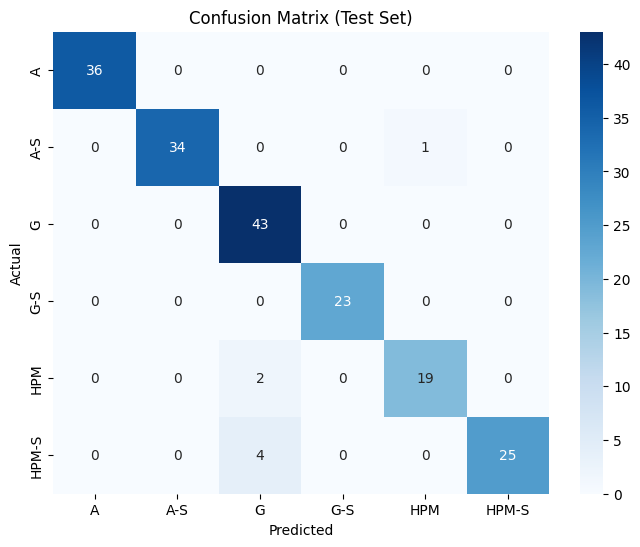

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'project 2 sap.csv'
data = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
data['Lable'] = label_encoder.fit_transform(data['Lable'])  # Encode target labels
y = data['Lable']
X = data.drop(columns=['Type', 'Lable'])

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Base models
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Train base models
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions on validation set for stacking
knn_val_preds = knn_model.predict_proba(X_val)
rf_val_preds = rf_model.predict_proba(X_val)
svm_val_preds = svm_model.predict_proba(X_val)

# Stack predictions for meta-learner
meta_X_val = np.hstack((knn_val_preds, rf_val_preds, svm_val_preds))

# Meta-learner: Logistic Regression
meta_learner = LogisticRegression()
meta_learner.fit(meta_X_val, y_val)

# Predictions on test set
knn_test_preds = knn_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
svm_test_preds = svm_model.predict(X_test)

# Test accuracies for base models
knn_accuracy = accuracy_score(y_test, knn_test_preds)
rf_accuracy = accuracy_score(y_test, rf_test_preds)
svm_accuracy = accuracy_score(y_test, svm_test_preds)

# Meta-learner evaluation
knn_test_proba = knn_model.predict_proba(X_test)
rf_test_proba = rf_model.predict_proba(X_test)
svm_test_proba = svm_model.predict_proba(X_test)

meta_X_test = np.hstack((knn_test_proba, rf_test_proba, svm_test_proba))
meta_test_preds = meta_learner.predict(meta_X_test)
meta_accuracy = accuracy_score(y_test, meta_test_preds)

# Print all accuracies
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"Meta-Learner Test Accuracy: {meta_accuracy:.4f}")

# Classification report and confusion matrix for the ensemble
print("\nMeta-Learner Classification Report:")
print(classification_report(y_test, meta_test_preds, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, meta_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0175 - loss: 1.8506    
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1676 - loss: 1.7201 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 1.6202 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 1.5071 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 1.4097 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 1.3113 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 1.2415 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7883 - loss: 1.1009 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8490 - loss: 1.0101 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.8939 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9163 - loss: 0.7716 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

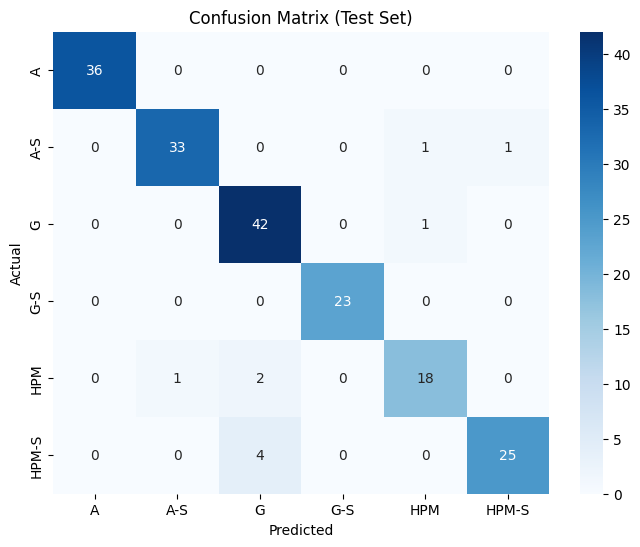

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'project 2 sap.csv'
data = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
data['Lable'] = label_encoder.fit_transform(data['Lable'])  # Encode target labels
y = data['Lable']
X = data.drop(columns=['Type', 'Lable'])

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels for the neural network
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

# Base models
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Train base models
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions on validation set for stacking
knn_val_preds = knn_model.predict_proba(X_val)
rf_val_preds = rf_model.predict_proba(X_val)
svm_val_preds = svm_model.predict_proba(X_val)

# Stack predictions for meta-learner
meta_X_val = np.hstack((knn_val_preds, rf_val_preds, svm_val_preds))

# Define and train the feedforward neural network as the meta-learner
meta_learner = Sequential([
    Dense(32, activation='relu', input_shape=(meta_X_val.shape[1],)),
    Dense(16, activation='relu'),
    Dense(y_val_onehot.shape[1], activation='softmax')
])

meta_learner.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
meta_learner.fit(meta_X_val, y_val_onehot, epochs=20, batch_size=16, verbose=1)

# Predictions on test set
knn_test_proba = knn_model.predict_proba(X_test)
rf_test_proba = rf_model.predict_proba(X_test)
svm_test_proba = svm_model.predict_proba(X_test)

meta_X_test = np.hstack((knn_test_proba, rf_test_proba, svm_test_proba))
meta_test_preds_proba = meta_learner.predict(meta_X_test)
meta_test_preds = np.argmax(meta_test_preds_proba, axis=1)

# Test accuracies for base models
knn_test_preds = knn_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
svm_test_preds = svm_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_test_preds)
rf_accuracy = accuracy_score(y_test, rf_test_preds)
svm_accuracy = accuracy_score(y_test, svm_test_preds)
meta_accuracy = accuracy_score(y_test, meta_test_preds)

# Print all accuracies
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"Meta-Learner (Neural Network) Test Accuracy: {meta_accuracy:.4f}")

# Classification report and confusion matrix for the ensemble
print("\nMeta-Learner Classification Report:")
print(classification_report(y_test, meta_test_preds, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, meta_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1751 - loss: 1.8494
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3273 - loss: 1.7490  
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3738 - loss: 1.6410
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3015 - loss: 1.6075
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3490 - loss: 1.5053
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4453 - loss: 1.4082
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6761 - loss: 1.3057
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 1.1925
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8415 - loss: 1.0780
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8628 - loss: 1.0103
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8763 - loss: 0.8865
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8995 - loss: 0.

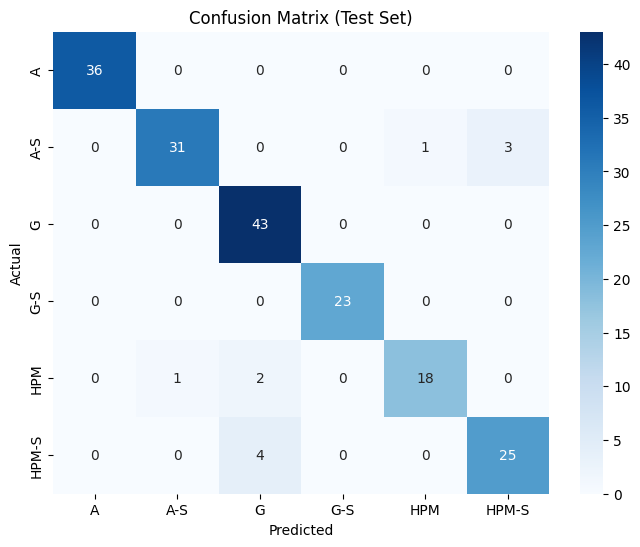

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'project 2 sap.csv'
data = pd.read_csv(file_path)

# Preprocessing
label_encoder = LabelEncoder()
data['Lable'] = label_encoder.fit_transform(data['Lable'])  # Encode target labels
y = data['Lable']
X = data.drop(columns=['Type', 'Lable'])

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels for the neural network
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

# Base models
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', probability=True)

# Train base models
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions on validation set for stacking
knn_val_preds = knn_model.predict_proba(X_val)
rf_val_preds = rf_model.predict_proba(X_val)
svm_val_preds = svm_model.predict_proba(X_val)

# Stack predictions for meta-learner
meta_X_val = np.hstack((knn_val_preds, rf_val_preds, svm_val_preds))

# Define and train the feedforward neural network as the meta-learner
meta_learner = Sequential([
    Dense(32, activation='relu', input_shape=(meta_X_val.shape[1],)),
    Dense(16, activation='relu'),
    Dense(y_val_onehot.shape[1], activation='softmax')
])

meta_learner.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = meta_learner.fit(meta_X_val, y_val_onehot, epochs=20, batch_size=16, verbose=1)

# Validation accuracy
val_accuracy = history.history['accuracy'][-1]

# Predictions on test set
knn_test_proba = knn_model.predict_proba(X_test)
rf_test_proba = rf_model.predict_proba(X_test)
svm_test_proba = svm_model.predict_proba(X_test)

meta_X_test = np.hstack((knn_test_proba, rf_test_proba, svm_test_proba))
meta_test_preds_proba = meta_learner.predict(meta_X_test)
meta_test_preds = np.argmax(meta_test_preds_proba, axis=1)

# Test accuracies for base models
knn_test_preds = knn_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
svm_test_preds = svm_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_test_preds)
rf_accuracy = accuracy_score(y_test, rf_test_preds)
svm_accuracy = accuracy_score(y_test, svm_test_preds)
meta_accuracy = accuracy_score(y_test, meta_test_preds)

# Print all accuracies
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"Meta-Learner (Neural Network) Validation Accuracy: {val_accuracy:.4f}")
print(f"Meta-Learner (Neural Network) Test Accuracy: {meta_accuracy:.4f}")

# Classification report and confusion matrix for the validation set
meta_val_preds_proba = meta_learner.predict(meta_X_val)
meta_val_preds = np.argmax(meta_val_preds_proba, axis=1)
print("\nMeta-Learner Validation Classification Report:")
print(classification_report(y_val, meta_val_preds, target_names=label_encoder.classes_))

# Classification report and confusion matrix for the test set
print("\nMeta-Learner Test Classification Report:")
print(classification_report(y_test, meta_test_preds, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, meta_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
